In [38]:
import cv2
import os
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [39]:
image_directory='datasets/'

In [40]:
no_tumor_images=os.listdir(image_directory+ 'no/')
# print(no_tumor_images)

In [41]:
yes_tumor_images=os.listdir(image_directory+ 'yes/')
print(yes_tumor_images)

['y0.jpg', 'y1.jpg', 'y10.jpg', 'y100.jpg', 'y1000.jpg', 'y1001.jpg', 'y1002.jpg', 'y1003.jpg', 'y1004.jpg', 'y1005.jpg', 'y1006.jpg', 'y1007.jpg', 'y1008.jpg', 'y1009.jpg', 'y101.jpg', 'y1010.jpg', 'y1011.jpg', 'y1012.jpg', 'y1013.jpg', 'y1014.jpg', 'y1015.jpg', 'y1016.jpg', 'y1017.jpg', 'y1018.jpg', 'y1019.jpg', 'y102.jpg', 'y1020.jpg', 'y1021.jpg', 'y1022.jpg', 'y1023.jpg', 'y1024.jpg', 'y1025.jpg', 'y1026.jpg', 'y1027.jpg', 'y1028.jpg', 'y1029.jpg', 'y103.jpg', 'y1030.jpg', 'y1031.jpg', 'y1032.jpg', 'y1033.jpg', 'y1034.jpg', 'y1035.jpg', 'y1036.jpg', 'y1037.jpg', 'y1038.jpg', 'y1039.jpg', 'y104.jpg', 'y1040.jpg', 'y1041.jpg', 'y1042.jpg', 'y1043.jpg', 'y1044.jpg', 'y1045.jpg', 'y1046.jpg', 'y1047.jpg', 'y1048.jpg', 'y1049.jpg', 'y105.jpg', 'y1050.jpg', 'y1051.jpg', 'y1052.jpg', 'y1053.jpg', 'y1054.jpg', 'y1055.jpg', 'y1056.jpg', 'y1057.jpg', 'y1058.jpg', 'y1059.jpg', 'y106.jpg', 'y1060.jpg', 'y1061.jpg', 'y1062.jpg', 'y1063.jpg', 'y1064.jpg', 'y1065.jpg', 'y1066.jpg', 'y1067.jpg', 

In [42]:
dataset=[]
label=[]
INPUT_SIZE=64

In [43]:
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory+'no/'+image_name) # Use os.path.join for correct path construction
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [44]:
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory+'yes/'+image_name)  # Use os.path.join for correct path construction
        image = Image.fromarray(image, 'RGB')
        image = image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [45]:
print(len(dataset))

3000


In [46]:
print(len(label))

3000


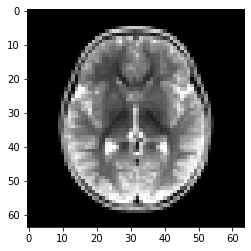

In [47]:
plt.imshow(dataset[0])

In [48]:
print(label[0])

0


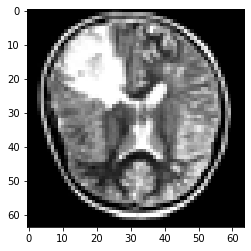

In [49]:
plt.imshow(dataset[1500])

In [50]:
print(label[1500])

1


In [51]:
set(label) #these r the class labels

{0, 1}

# convert this dataset into array

In [52]:
dataset=np.array(dataset)
label=np.array(label)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=0)

In [54]:
# (n,image_width,image_height,n_channel)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


In [56]:
#for naormalize data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import normalize, to_categorical

In [57]:
x_train = normalize(x_train,axis=1)
x_test = normalize(x_test,axis=1)

In [58]:
y_train=to_categorical(y_train, num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

# for creating Model

In [59]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout,Flatten,Dense

In [60]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3))) #64,64,3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [61]:
# Binary Cross Entropy= 1, sigmoid
# Categorical Cross Entryopy= 2, softmax

# Compiling the model

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

# Training the model

In [68]:
model.fit(x_train, y_train,
          batch_size=16,
          verbose=1,
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10
150/150 [==============================] - 5s 35ms/step - loss: 0.5544 - accuracy: 0.7246 - val_loss: 0.4619 - val_accuracy: 0.8067
Epoch 2/10
150/150 [==============================] - 5s 35ms/step - loss: 0.4043 - accuracy: 0.8200 - val_loss: 0.3498 - val_accuracy: 0.8600
Epoch 3/10
150/150 [==============================] - 5s 34ms/step - loss: 0.3285 - accuracy: 0.8571 - val_loss: 0.3532 - val_accuracy: 0.8350
Epoch 4/10
150/150 [==============================] - 5s 35ms/step - loss: 0.2374 - accuracy: 0.9033 - val_loss: 0.1930 - val_accuracy: 0.9467
Epoch 5/10
150/150 [==============================] - 5s 36ms/step - loss: 0.1616 - accuracy: 0.9388 - val_loss: 0.1681 - val_accuracy: 0.9383
Epoch 6/10
150/150 [==============================] - 6s 37ms/step - loss: 0.1165 - accuracy: 0.9600 - val_loss: 0.1343 - val_accuracy: 0.9500
Epoch 7/10
150/150 [==============================] - 6s 37ms/step - loss: 0.0812 - accuracy: 0.9733 - val_loss: 0.0890 - val_accuracy: 0.9717

In [69]:
model.save('BrainTumor10EpochsCategorical.h5')

In [70]:
loss,accuracy = model.evaluate(x_test,y_test)
print('testSet Accuracy',accuracy*100)

19/19 [==============================] - 0s 14ms/step - loss: 0.0827 - accuracy: 0.9800
testSet Accuracy 98.00000190734863


# predictions on Testset

In [71]:
preds=model.predict(x_test)
print('shape of preds:',preds.shape)

shape of preds: (600, 2)
